In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup

## Data import and preprocessing

In [2]:
# data import function created:

def import_data(link, name):
    sheet_id = link
    sheet_name = name
    url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
    name = pd.read_csv(url)
    return name

# import dataframes:

flights = import_data('1y9hU3YhRlz95VPwY4xF-7na0PJ2oO_0JZ8E0MxzAvPY', 'flights')
city = import_data('1GPO4qvUw0RKraJzFeq8PzUdn2WjU6K87KNiqQaWBMEE', 'city')
festivals = import_data('1RN8jOelaUHZJdsZJTvp3X212fJ3paof0fmzroXc6uU4', 'festivals')

This section will cover **general information** about dataframes. First you need to look at the first 5 lines of each dataframe to determine what information is involved in the research

In [3]:
display(flights.head())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [4]:
display(city.head())

,city,average_flights
0,Abakan,3.870968
1,Anadyr,1.000000
2,Anapa,2.161290
3,Arkhangelsk,5.354839
4,Astrakhan,2.451613


In [5]:
display(festivals.head())

,name_of_the_festival,city,date_of_the_event
0,"Music festival ""Manor Jazz""",Yekaterinburg,01.07.2018
1,Alfa Future People Music and Technology Festival,Nizhniy Novgorod,10.08.2018
2,"Food Festival ""Oh, yes! Food!""",St. Petersburg,21.07.2018
3,Good fest,Yaroslavl,29.07.2018
4,Park Live,Moscow,28.07.2018


Also, for an introductory analysis, it is necessary to study the numerical parameters

In [6]:
flights.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [7]:
city.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Among other things, it is necessary to establish what types of data are present in dataframes

In [8]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [9]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [10]:
festivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name_of_the_festival  11 non-null     object
 1   city                  11 non-null     object
 2   date_of_the_event     11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


Data on **missing** values are also investigated

In [11]:
flights.isnull().sum()

model             0
flights_amount    0
dtype: int64

In [12]:
city.isnull().sum()

city               0
average_flights    0
dtype: int64

In [13]:
festivals.isnull().sum()

name_of_the_festival    0
city                    0
date_of_the_event       0
dtype: int64

No omissions detected

For further research, a slice of **10 cities with the largest number of incoming flights** was created and saved to a new top10 dataframe:

In [14]:
top10 = city.sort_values(by = 'average_flights', ascending = False).head(10)
top10

,city,average_flights
43,Moscow,129.774194
70,St. Petersburg,31.161290
54,Novosibirsk,17.322581
33,Krasnoyarsk,11.580645
20,Yekaterinburg,11.322581
67,Rostov-on-Don,10.193548
63,Permian,10.129032
10,Bryansk,10.000000
74,Sochi,9.612903
84,Ulyanovsk,9.580645


**Conclusion**:

The 'flights' dataframe contains information about the aircraft model and the number of flights on each aircraft model.There are 8 aircraft models in total. On average, each aircraft model completed 2035.63 flights. The minimum number of flights is 300, the maximum is 4557. It contains 2 columns and 8 rows. The 'model' column belongs to the 'object' data type, because it contains information about the names of aircraft models. Column 'flights_amount' - type 'int64' with information about the number of flights on each model.

The 'city' dataframe contains data about the city and the average number of arriving flights per day for each city. The list of cities includes 101 names. The average number of incoming flights to each city ranges from 1 to almost 130 per day. It also contains 2 columns and 101 rows. The 'city' column, respectively, contains the names of cities and belongs to the type 'object'. The 'average_flights' column contains information about the average number of arriving flights per day for each city, the data in it belongs to the 'float64' type.

It is also worth noting that there are no missing values in the above dataframes.

The data types are correct, no replacement is required. 

For further analysis, a 'top10' dataframe was created with a slice of data on 10 cities with the largest number of incoming flights.

## Research data analysis

The next stage of the research will be the research of passenger demand for flights to the cities where the largest festivals are held. To do this, it is necessary to explore the preferences of users who buy tickets to certain destinations.

### Comparative analysis of the number of flights in the context of each aircraft model

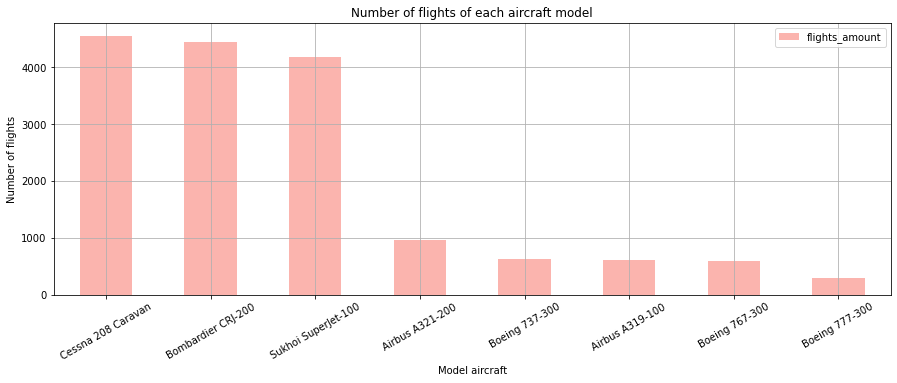

In [15]:
flights.sort_values(by = 'flights_amount', ascending = False). plot(y = 'flights_amount', 
                                                                     x = 'model',
                                                                     figsize = (15, 5),
                                                                     kind = 'bar', 
                                                                     grid = True, 
                                                                     cmap = 'Pastel1', 
                                                                     title = 'Number of flights of each aircraft model')
plt.ylabel('Number of flights')
plt.xlabel('Model aircraft')
plt.xticks(rotation=30);

The leading position in the number of flights is occupied by the Cessna 208 Caravan model. This is a light single-engine general-purpose turboprop aircraft, the crew of the aircraft consists of one pilot (two pilots when performing commercial flights according to instrument flight rules), the base model carries nine passengers.

The second place belongs to the 'Bombardier CRJ-200' model, with a passenger capacity of only up to 50 people.

Completing the top three is the Sukhoi Superjet-100, a Russian short-haul narrow-body passenger aircraft designed to carry from 87 to 108 passengers at a range of 3050 or 4600 km.

There are almost 4 times fewer flights for Airbus and Boeing aircraft models.

### Comparative analysis of the number of incoming flights per day for each city

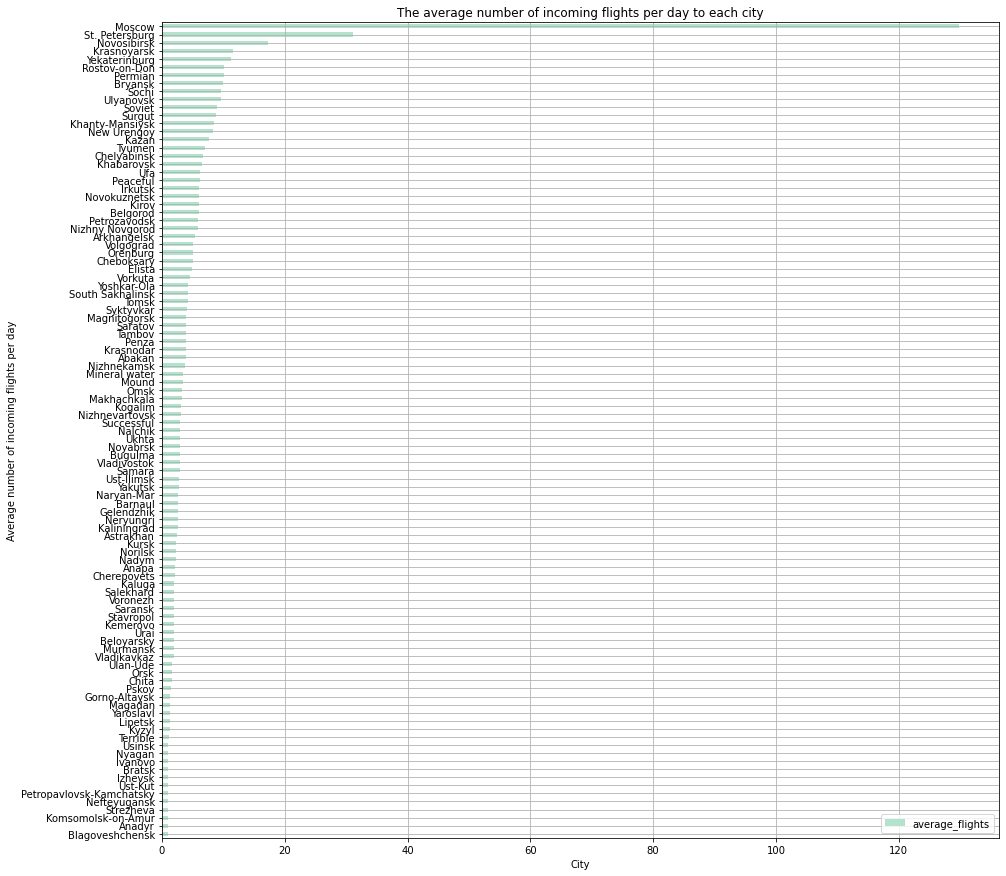

In [16]:
city.sort_values(by = 'average_flights').plot(y = 'average_flights', 
                                              x = 'city',
                                              figsize = (15, 15),
                                              kind = 'barh', 
                                              grid = True, 
                                              cmap = 'Pastel2',
                                              title = 'The average number of incoming flights per day to each city')
plt.ylabel('Average number of incoming flights per day')
plt.xlabel('City')
plt.xticks(rotation=0);

Since the list of 101 cities is being investigated, it should be expected that the graph will not be indicative. Therefore, in the next subsection, this issue will be studied in the context of the top 10 cities with the largest number of incoming flights

### Comparative analysis of the number of incoming flights per day to each city from the top 10 with the largest number of flights

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Moscow'),
  Text(1, 0, 'St. Petersburg'),
  Text(2, 0, 'Novosibirsk'),
  Text(3, 0, 'Krasnoyarsk'),
  Text(4, 0, 'Yekaterinburg'),
  Text(5, 0, 'Rostov-on-Don'),
  Text(6, 0, 'Permian'),
  Text(7, 0, 'Bryansk'),
  Text(8, 0, 'Sochi'),
  Text(9, 0, 'Ulyanovsk')])

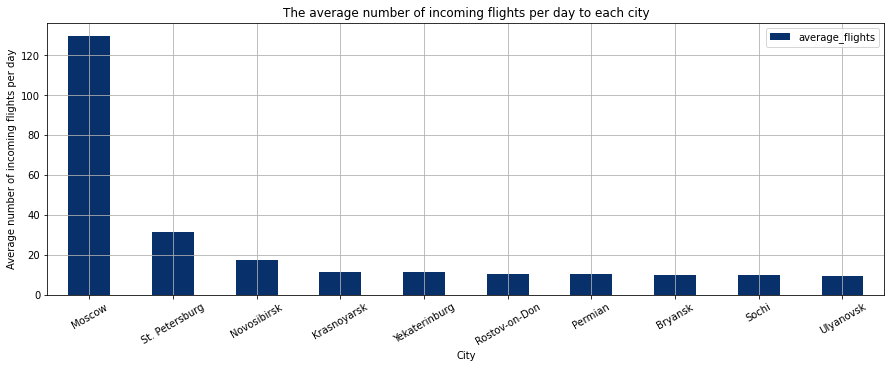

In [17]:
top10.plot(y = 'average_flights', 
           x = 'city',
           figsize = (15, 5),
           kind = 'bar',
           grid = True,
           cmap = 'Blues_r',
           title = 'The average number of incoming flights per day to each city')
plt.ylabel('Average number of incoming flights per day')
plt.xlabel('City')
plt.xticks(rotation=30)

The 3 largest cities of Russia are expected to occupy the leading places: Moscow with almost 130 incoming flights per day, St. Petersburg - 31 flights, and Novosibirsk - 17 flights. The list also includes Krasnoyarsk, Yekaterinburg, Rostov-on-Don, Perm, Bryansk, Sochi and Ulyanovsk with approximately the same daily number of arriving flights: from 9.6 to 11.6.

### Analysis of the venue of the largest festivals

In [18]:
festivals.merge(city, how = 'inner')

,name_of_the_festival,city,date_of_the_event,average_flights
0,"Music festival ""Manor Jazz""",Yekaterinburg,01.07.2018,11.322581
1,"Food Festival ""Oh, yes! Food!""",St. Petersburg,21.07.2018,31.161290
2,VK FEST,St. Petersburg,29.07.2018,31.161290
3,Good fest,Yaroslavl,29.07.2018,1.322581
4,Park Live,Moscow,28.07.2018,129.774194
5,Picnic Posters,Moscow,04.08.2018,129.774194
6,Vidfest,Moscow,08.09.2018,129.774194
7,"Food Festival ""Oh, yes! Food!""",Irkutsk,25.08.2018,6.032258
8,"Food Festival ""Oh, yes! Food!""",Vladivostok,02.09.2018,3.000000


In [19]:
city.query('city == "Tver"')

,city,average_flights


The resulting dataframe does not contain information about flights to Tver, although it hosts one of the largest festivals "Invasion 2018"

## Conclusion

In the course of this work, the demand of F9 airline customers buying tickets to certain destinations was investigated.
To do this, information about the aircraft models used for airline passengers' flights and the number of flights for each model were analyzed:
- The Cessna 208 Caravan model has the most flights. This model carries only nine passengers and is adapted to work in difficult conditions, including at unpaved airfields, respectively, it can be assumed that these aircraft are in great demand for servicing local lines, since the cost of transportation on An-2, traditionally operated on these routes, has increased due to the high cost of aviation gasoline. At the same time, the Cessna aircraft is refueled with conventional aviation kerosene.
- The second place belongs to the 'Bombardier CRJ-200' model, with a passenger capacity of only up to 50 people.
- The Sukhoi Superjet-100 model closes the top three - a passenger aircraft designed to carry from 87 to 108 passengers at a range of 3050 or 4600 km.
- There are almost 4 times fewer flights for Airbus and Boeing aircraft models.

Data on the average daily number of incoming flights to each of more than 100 cities were also analyzed.
The leading places are occupied by the 3 largest cities of Russia: 
- Moscow with almost 130 incoming flights per day, 
- Saint Petersburg - 31 flights, 
- Novosibirsk - 17 flights,
- Krasnoyarsk, Yekaterinburg, Rostov-on-Don, Perm, Bryansk, Sochi and Ulyanovsk with approximately the same daily number of arriving flights: from 9.6 to 11.6.

Such a number of flights to Moscow is primarily due to the fact that this city is a connected point for many routes, because for many cities there is no direct air line. For example, it may be difficult to fly directly from Irkutsk to Bryansk.

When analyzing the summary table from these cities with festivals held in them and the number of flights to these cities , the following conclusions can be drawn:
- Half of the festivals are held in Moscow (3 events) and St. Petersburg (2 events). Since these cities occupy leading positions in the list of cities with the largest number of incoming flights, respectively, everything is fine.
- In Yekaterinburg, Nizhny Novgorod and Irkutsk there was 1 festival each. It should also be noted that an average of ~ 6 to ~ 11 flights a day arrive in these cities.
- Cities such as Yaroslavl and Vladivostok were also venues for major festivals in September 2018, however, quite a few flights arrive in them: ~ 1 and 3 flights, respectively. It is necessary to analyze the demand of passengers for these destinations and, if the need is identified, add flights to the above cities to increase the airline's profit.
- Tver has also become the venue for the festival "Invasion 2018", but the airline F9 has no flights in this direction. It can be concluded that the company is missing revenue in this direction and it should be studied more whether it makes sense to create a flight to this city.

If there is additional data not only about the place of arrival, but also about the place of departure of the aircraft, you can perform an analysis and give recommendations for the operation of aircraft models. In this situation, it is problematic to do this, since even the aircraft models from the leading three with the largest number of flights are strikingly different from each other not only in flight distance, but also in passenger capacity.